In [1]:
import sys
sys.path.append('../src')

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from predict import Denoiser

In [2]:
noisy_spectrums = sorted(list(Path('../data/train/noisy').rglob('*.npy')))[10:15]
noisy_spectrums = [np.load(spectrum) for spectrum in noisy_spectrums]

clean_spectrums = sorted(list(Path('../data/train/clean').rglob('*.npy')))[10:15]
clean_spectrums = [np.load(spectrum) for spectrum in clean_spectrums]

In [3]:
denoiser = Denoiser(
    model_path='../weights/unet_autoencoder_92b18d_epoch=98-step=4653.onnx',
    max_len=1024,
    n_mels=80,
    device_id=0,
    gpu_mem_limit_gb=7,
)

denoised = denoiser(noisy_spectrums)

/home/chaganovaob/.cache/pypoetry/virtualenvs/test-tasks-ml-kyHu5WkP-py3.10/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:54: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


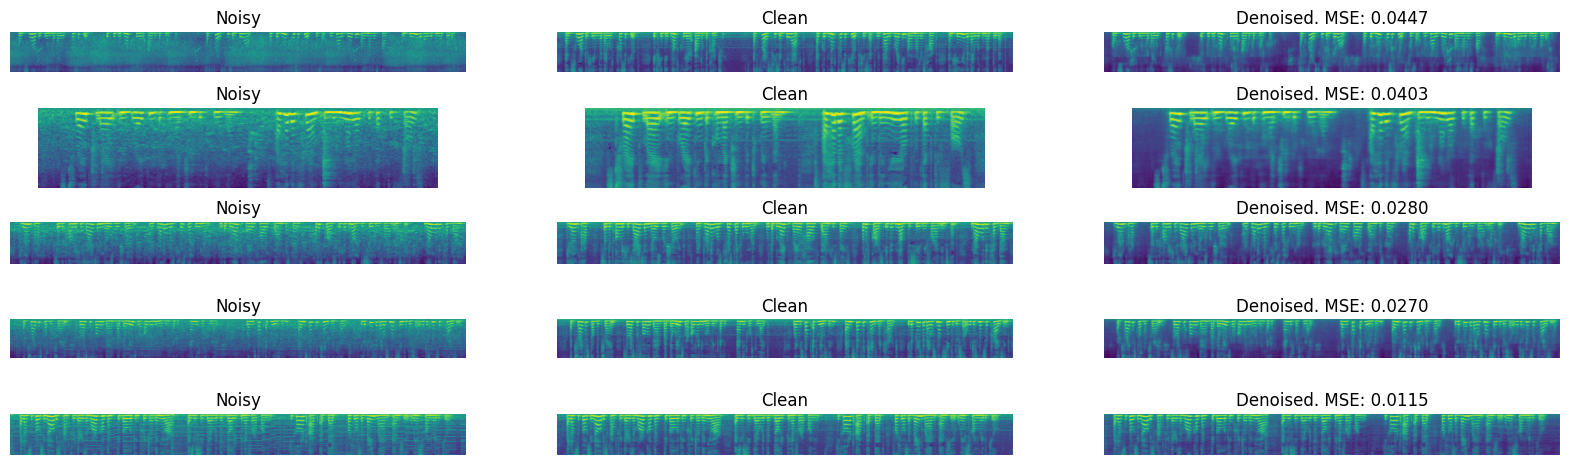

In [4]:
fig, axs = plt.subplots(5, 3, figsize=(20, 6))

for i in range(len(clean_spectrums)):
    axs[i, 0].imshow(noisy_spectrums[i].T)
    axs[i, 0].set_title('Noisy')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(clean_spectrums[i].T)
    axs[i, 1].set_title('Clean')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(denoised[i].T)
    axs[i, 2].set_title(f'Denoised. MSE: {((denoised[i] - clean_spectrums[i]) ** 2).mean():.4f}')
    axs[i, 2].axis('off')

## val

In [5]:
noisy_spectrums = sorted(list(Path('../data/val/noisy').rglob('*.npy')))[10:15]
noisy_spectrums = [np.load(spectrum) for spectrum in noisy_spectrums]

clean_spectrums = sorted(list(Path('../data/val/clean').rglob('*.npy')))[10:15]
clean_spectrums = [np.load(spectrum) for spectrum in clean_spectrums]

In [6]:
denoised = denoiser(noisy_spectrums)

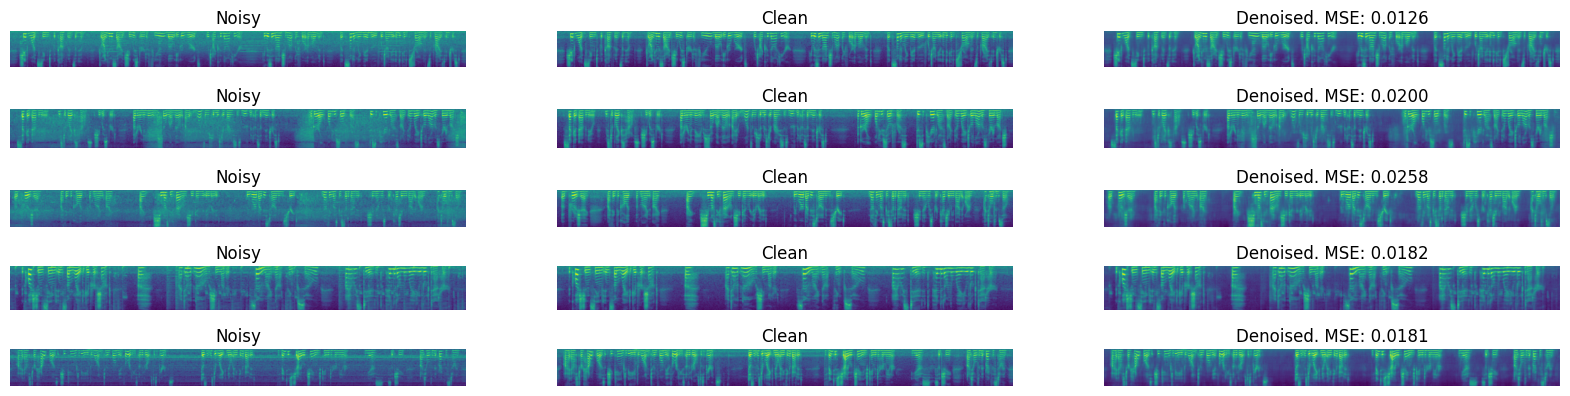

In [7]:
fig, axs = plt.subplots(5, 3, figsize=(20, 5))

for i in range(len(clean_spectrums)):
    axs[i, 0].imshow(noisy_spectrums[i].T)
    axs[i, 0].set_title('Noisy')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(clean_spectrums[i].T)
    axs[i, 1].set_title('Clean')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(denoised[i].T)
    axs[i, 2].set_title(f'Denoised. MSE: {((denoised[i] - clean_spectrums[i]) ** 2).mean():.4f}')
    axs[i, 2].axis('off')